In [587]:
# Notebook for Fantasy Statistics 2023

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.linear_model import LinearRegression
from operator import itemgetter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [588]:
# load in the data:

data_path ="/Users/benrasmussen/Desktop/fantasy_data.csv"
names = np.loadtxt(data_path, dtype='str',skiprows=1, delimiter=',', usecols=(0))
data = np.loadtxt(data_path, dtype='float',skiprows=1, delimiter=',', usecols=range(1,12)).T

data_pd = pd.read_csv(data_path)
data_pd.head()
df = pd.DataFrame(data_pd)

colours = ['goldenrod', 'yellow', 'crimson', 'mediumseagreen','cornflowerblue', 'paleturquoise', 'darkgreen', 'bisque','slategray','maroon'] 
           
markers = ['o', 'v', '8', 's', 'D', 'P', 'p', 'h', '*','<']     

im_paths = ['/Users/benrasmussen/Desktop/'+'IMG_30'+str(i)+'.png' for i in range(43,53)]

im_paths_adj =[im_paths[1],im_paths[0],im_paths[2],im_paths[3],im_paths[4],
                 im_paths[7],im_paths[6],im_paths[9],im_paths[8],im_paths[5]]

im_paths_adj2 =[im_paths[1],im_paths[0],im_paths[2],im_paths[3],im_paths[9],
                 im_paths[7],im_paths[6],im_paths[8],im_paths[4],im_paths[5]]


In [589]:
21341087956

21341087956

In [590]:
def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

In [591]:
name = df['Team'].head(12);wins = df['Wins'].head(12)
losses = df['Losses'].head(12);PF = df['PF'].head(12)
PA = df['PA'].head(12);PF_PA = df['PF:PA'].head(12)
moves = df['Moves'].head(12); trades = df['Trades'].head(12)
pyth = df['PYTH'].head(12);pyth_adj = df['PYTH (ADJ)'].head(12)
aps = df['APS'].head(12);skill = df['SKILL'].head(12)
luck = df['LUCK'].head(12); skill_adj = df['SKILL ADJ'].head(12)
luck_adj = df['LUCK ADJ'].head(12)

sort_name = df['SORTNAME'].head(12)
sort_pyth = df['SORTPYTH'].head(12)
sort_pyth_adj = df['SORTPYTHADJ'].head(12)
sort_name_adj = df['SORTNAMEADJ'].head(12)


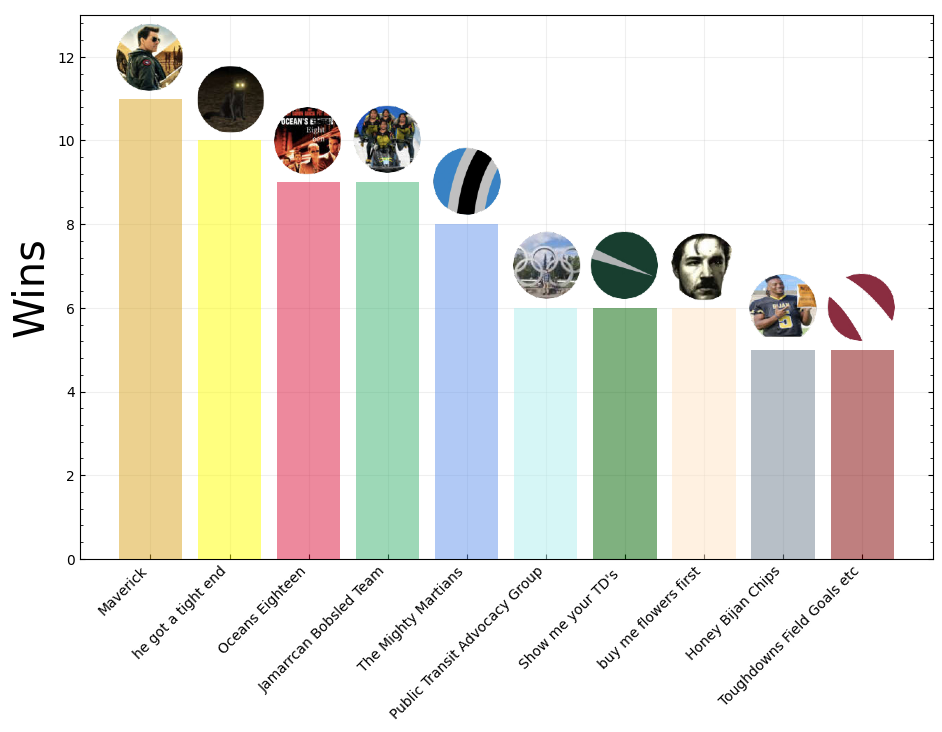

In [639]:
width=11;height=8;ff, ax1 = plt.subplots(1,1, sharex=True, sharey=True);ff.set_figwidth(width);ff.set_figheight(height)
ax1.set_ylabel("Wins", fontsize=30)
ax1.set_ylim(0,13)
ax1.bar(name, wins, color=colours,zorder=10,alpha=0.5)

#for xp,yp, m, c in zip(name,wins,markers,colours):
#    ax1.scatter([xp], [yp], color=c, marker=m, s=180,zorder=30)

for x0, y0, path in zip(name, wins,im_paths):
    ab = AnnotationBbox(getImage(path,0.5), (x0, y0+1), frameon=False, zorder=10)
    ax1.add_artist(ab)

ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.tick_params(axis='both', direction="in")
#ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
#ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.2, zorder=0)
ff.autofmt_xdate(rotation=45)

plt.savefig('/Users/benrasmussen/Desktop/Fantasy/wins.png', dpi=300)

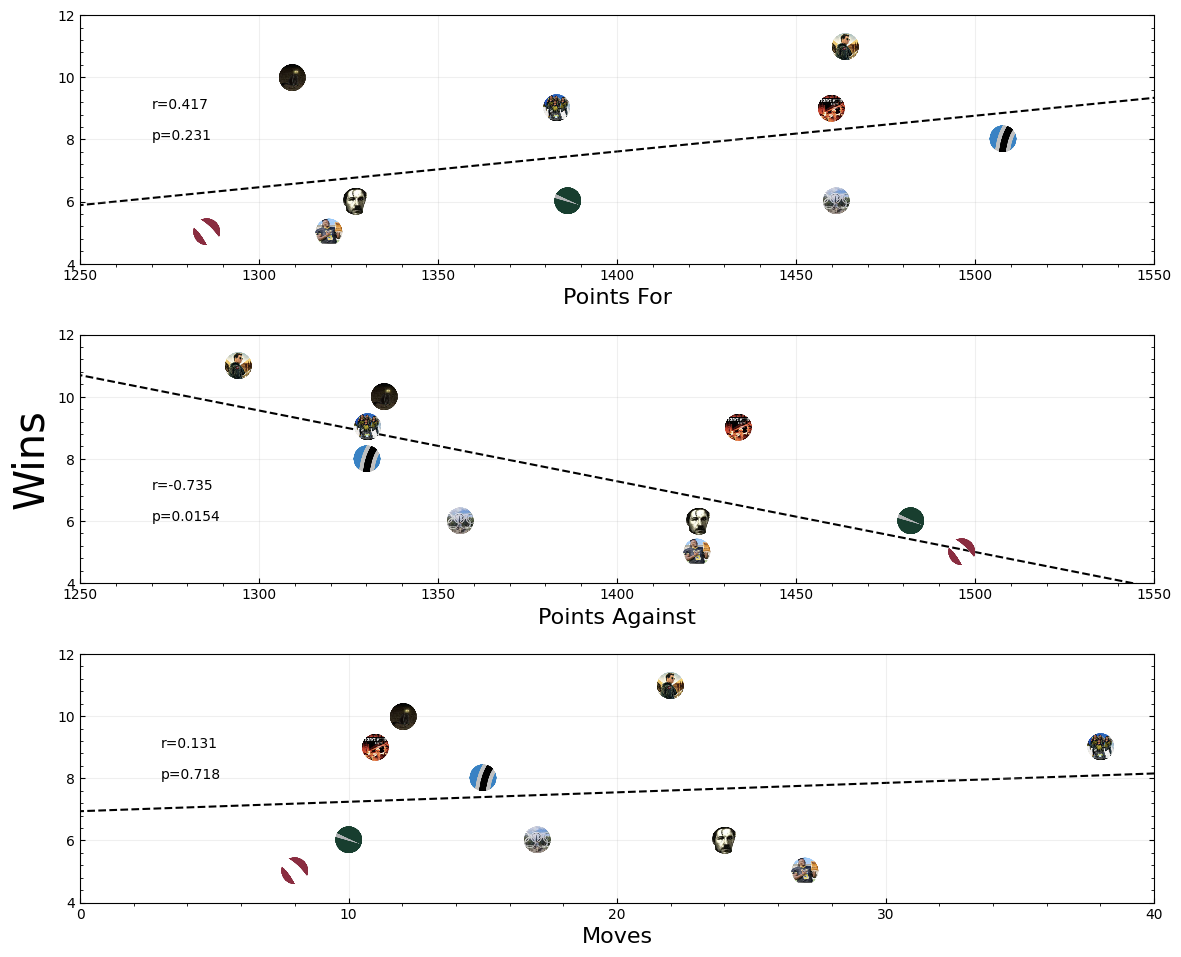

In [640]:

pf_wins = LinearRegression().fit(PF.values.reshape(-1,1),wins)
pfw_m = pf_wins.coef_; pfw_b = pf_wins.intercept_

pf_wins_r = sp.stats.pearsonr(PF,wins)

pa_wins = LinearRegression().fit(PA.values.reshape(-1,1),wins)
paw_m = pa_wins.coef_; paw_b = pa_wins.intercept_

pa_wins_r = sp.stats.pearsonr(PA,wins)

moves_wins = LinearRegression().fit(moves.values.reshape(-1,1),wins)
movesw_m = moves_wins.coef_; movesw_b = moves_wins.intercept_

moves_wins_r = sp.stats.pearsonr(moves,wins)

width=12;height=10;ff, (ax1,ax2,ax3) = plt.subplots(3,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=3)
#ff.supylabel("Wins", fontsize=30)
ax2.set_ylabel("Wins", fontsize=30)
ax1.set_xlabel("Points For",fontsize=16)
ax1.set_ylim(0,12)


for x0, y0, path in zip(PF, wins,im_paths):
    ab = AnnotationBbox(getImage(path,0.2), (x0, y0), frameon=False, zorder=10)
    ax1.add_artist(ab)
    
ax1.text(1270,9,f'r={pf_wins_r[0]:0.3}')  
ax1.text(1270,8,f'p={pf_wins_r[1]:0.3}')    


ax1.set_ylim(4,12)
pfwx = np.linspace(min(PF)-100, max(PF)+100,100)

ax1.plot(pfwx, pfw_m*pfwx+pfw_b,c='k', linestyle='--',zorder=0)

ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.tick_params(axis='both', direction="in")
ax1.xaxis.set_minor_locator(MultipleLocator(10));ax1.xaxis.set_major_locator(MultipleLocator(50))

#ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
#ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.2, zorder=0)

ax1.set_xlim(1250,1550)
ax2.set_xlim(1250,1550)


ax2.set_xlabel("Points Against",fontsize=16)
ax2.set_ylim(0,12)

for x0, y0, path in zip(PA, wins,im_paths):
    ab = AnnotationBbox(getImage(path,0.2), (x0, y0), frameon=False, zorder=10)
    ax2.add_artist(ab)

ax2.text(1270,7,f'r={pa_wins_r[0]:0.3}')  
ax2.text(1270,6,f'p={pa_wins_r[1]:0.3}')

ax2.set_ylim(4,12)
pawx = np.linspace(min(PA)-100, max(PA)+100,100)

ax2.plot(pawx, paw_m*pawx+paw_b,c='k', linestyle='--',zorder=0)

ax2.yaxis.set_minor_locator(MultipleLocator(0.4))
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.tick_params(axis='both', direction="in")
ax2.xaxis.set_minor_locator(MultipleLocator(10));ax1.xaxis.set_major_locator(MultipleLocator(50))

ax2.tick_params(which="minor", axis="y", direction="in")
ax2.yaxis.set_ticks_position('both')
ax2.grid(True, alpha=0.2, zorder=0)

ax3.set_xlabel("Moves",fontsize=16)

for x0, y0, path in zip(moves, wins,im_paths):
    ab = AnnotationBbox(getImage(path,0.2), (x0, y0), frameon=False, zorder=10)
    ax3.add_artist(ab)

ax3.text(3,9,f'r={moves_wins_r[0]:0.3}')  
ax3.text(3,8,f'p={moves_wins_r[1]:0.3}')
ax3.set_ylim(4,12)
moveswx = np.linspace(min(moves)-100, max(moves)+100,100)

ax3.plot(moveswx, movesw_m*moveswx+movesw_b,c='k', linestyle='--', zorder=0)

ax3.set_xlim(0,40)
ax3.yaxis.set_minor_locator(MultipleLocator(0.4))
ax3.yaxis.set_major_locator(MultipleLocator(2))
ax3.tick_params(axis='both', direction="in")
ax3.xaxis.set_minor_locator(MultipleLocator(2));ax3.xaxis.set_major_locator(MultipleLocator(10))

ax3.tick_params(which="minor", axis="y", direction="in")
ax3.yaxis.set_ticks_position('both')
ax3.grid(True, alpha=0.2, zorder=0)

plt.savefig('/Users/benrasmussen/Desktop/Fantasy/corr.png', dpi=300)


In [594]:
# pythagorean wins difference

delta_w = wins - pyth
delta_w = [delta_w[i] for i in range(len(delta_w))]
delta_w_adj = wins - pyth_adj
delta_w_adj = [delta_w_adj[i] for i in range(len(delta_w_adj))]


names_dw = np.array([names, (delta_w)]).T
names_dw_adj = np.array([names, (delta_w_adj)]).T


sorted_ndw = np.array(sorted(names_dw_adj, key=itemgetter(1),reverse=False)).T
sort_delta=sorted(delta_w_adj, reverse=True)


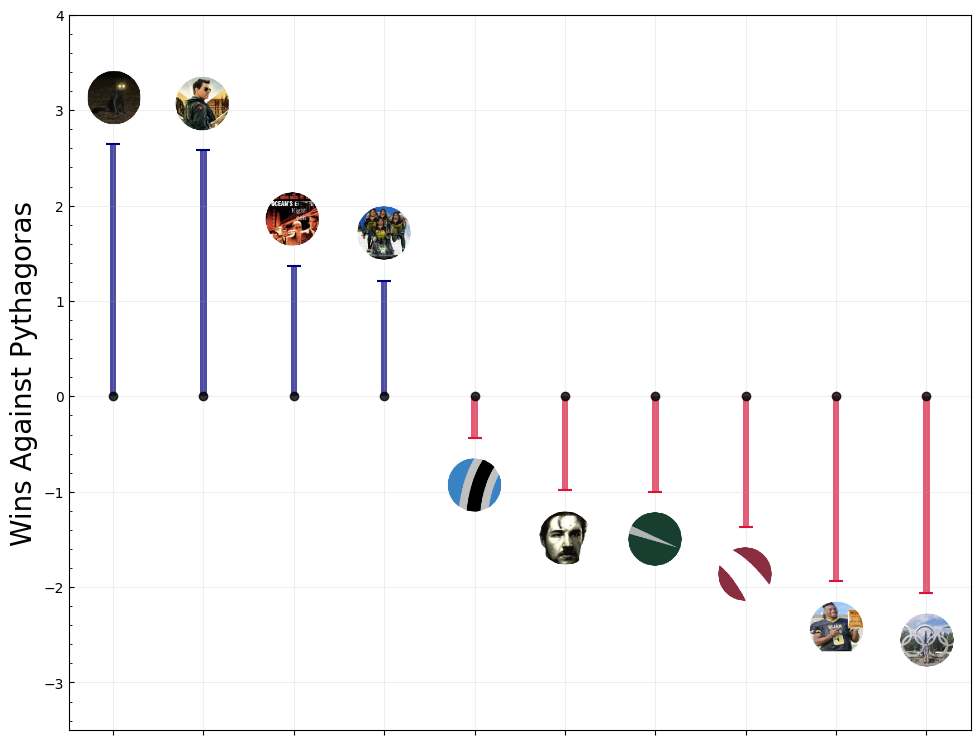

In [641]:


width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=2)
#ff.supylabel("Wins", fontsize=30)
#ax1.set_xlabel("Pythagorean Wins")
ax1.set_ylabel("Wins Against Pythagoras", fontsize=20)


ax1.bar(sort_name, sort_pyth,color=['crimson' if val < 0 else 'navy' for val in sort_pyth],width=0.07, alpha=0.7)
ax1.scatter([0,1,2,3,4,5,6,7,8,9], [0,0,0,0,0,0,0,0,0,0], c='k', zorder=100, alpha=0.8)

for xp,yp, m, c in zip(sort_name,sort_pyth,markers,colours):
    ax1.scatter([xp], [yp if yp>0 else yp], color=['crimson' if yp < 0 else 'navy'], marker='_', s=100,zorder=30)
    
for x0, y0, path in zip(sort_name,sort_pyth,im_paths_adj):
    ab = AnnotationBbox(getImage(path,0.4), (x0, y0+0.5 if y0>0 else y0-0.5), frameon=False, zorder=10)
    ax1.add_artist(ab)

ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.tick_params(axis='y', direction="in")

#ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
#ax1.xaxis.set_ticks_position('both') 
#ax1.yaxis.set_ticks_position('y')
ax1.grid(True, alpha=0.2, zorder=0)
#ff.autofmt_xdate(rotation=45)

ax1.set_ylim(-3.5,4)
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9],labels=[])

plt.savefig('/Users/benrasmussen/Desktop/Fantasy/pyth.png', dpi=300)


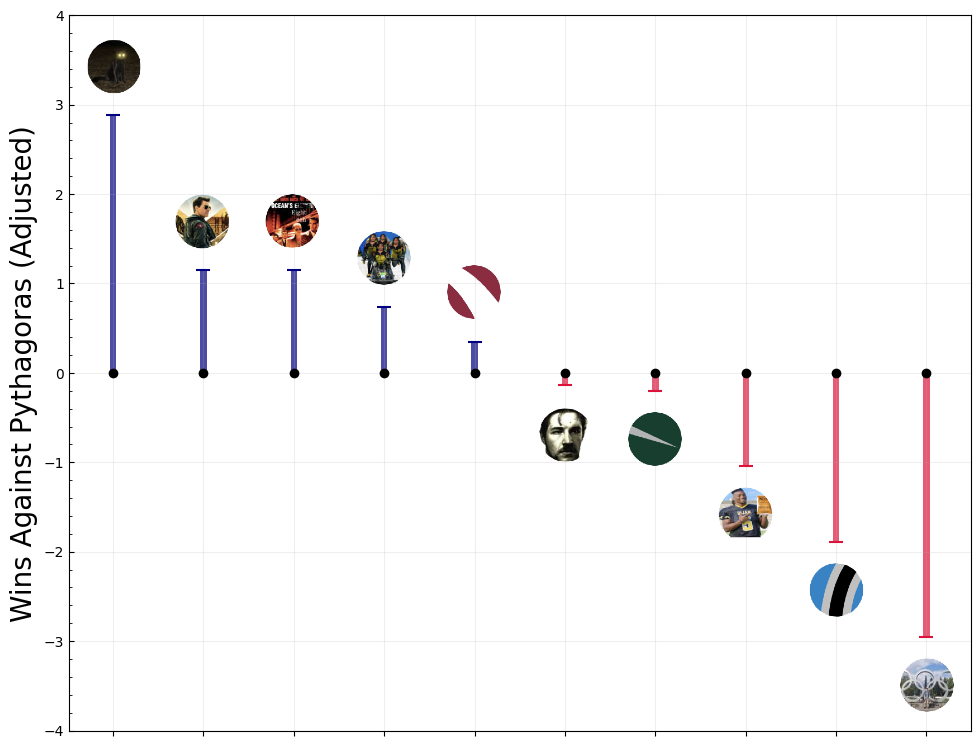

In [642]:
width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=2)
#ff.supylabel("Wins", fontsize=30)
#ax1.set_xlabel("Pythagorean Wins")
ax1.set_ylabel("Wins Against Pythagoras (Adjusted)", fontsize=20)


ax1.bar(sort_name_adj, sort_pyth_adj,color=['crimson' if val < 0 else 'navy' for val in sort_pyth_adj],width=0.07, alpha=0.7)
ax1.scatter([0,1,2,3,4,5,6,7,8,9], [0,0,0,0,0,0,0,0,0,0], c='k', zorder=100)

for xp,yp, m, c in zip(sort_name_adj,sort_pyth_adj,markers,colours):
    ax1.scatter([xp], [yp if yp>0 else yp], color=['crimson' if yp < 0 else 'navy'], marker='_', s=100,zorder=30)
    
for x0, y0, path in zip(sort_name_adj,sort_pyth_adj,im_paths_adj2):
    ab = AnnotationBbox(getImage(path,0.4), (x0, y0+0.55 if y0>0 else y0-0.55), frameon=False, zorder=10)
    ax1.add_artist(ab)

ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.tick_params(axis='y', direction="in")

#ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
#ax1.xaxis.set_ticks_position('both') 
#ax1.yaxis.set_ticks_position('y')
ax1.grid(True, alpha=0.2, zorder=0)
#ff.autofmt_xdate(rotation=45)

ax1.set_ylim(-4,4)
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9],labels=[])

plt.savefig('/Users/benrasmussen/Desktop/Fantasy/pyth_adj.png', dpi=300)


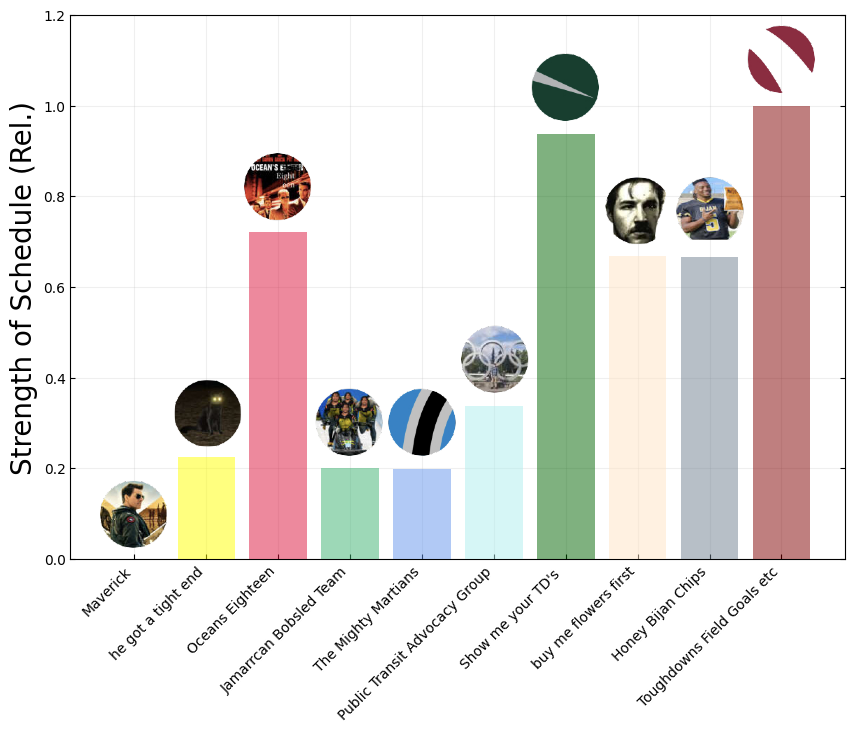

In [643]:
sos = 15-luck*15 / max(luck)


width=10;height=8;ff, ax1 = plt.subplots(1,1, sharex=True, sharey=True);ff.set_figwidth(width);ff.set_figheight(height)
ax1.set_ylabel("Strength of Schedule (Rel.)", fontsize=20)
#ax1.set_ylim(0,13)
ax1.bar(name, sos/max(sos), color=colours,zorder=10,alpha=0.5)

#for xp,yp, m, c in zip(name,wins,markers,colours):
#    ax1.scatter([xp], [yp], color=c, marker=m, s=180,zorder=30)

for x0, y0, path in zip(name, sos/max(sos),im_paths):
    ab = AnnotationBbox(getImage(path,0.5), (x0, y0+0.1), frameon=False, zorder=10)
    ax1.add_artist(ab)

#ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
#ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.tick_params(axis='both', direction="in")
#ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
#ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.2, zorder=0)
ff.autofmt_xdate(rotation=45)
ax1.set_ylim(0,1.2)
plt.savefig('/Users/benrasmussen/Desktop/Fantasy/sos.png', dpi=300)


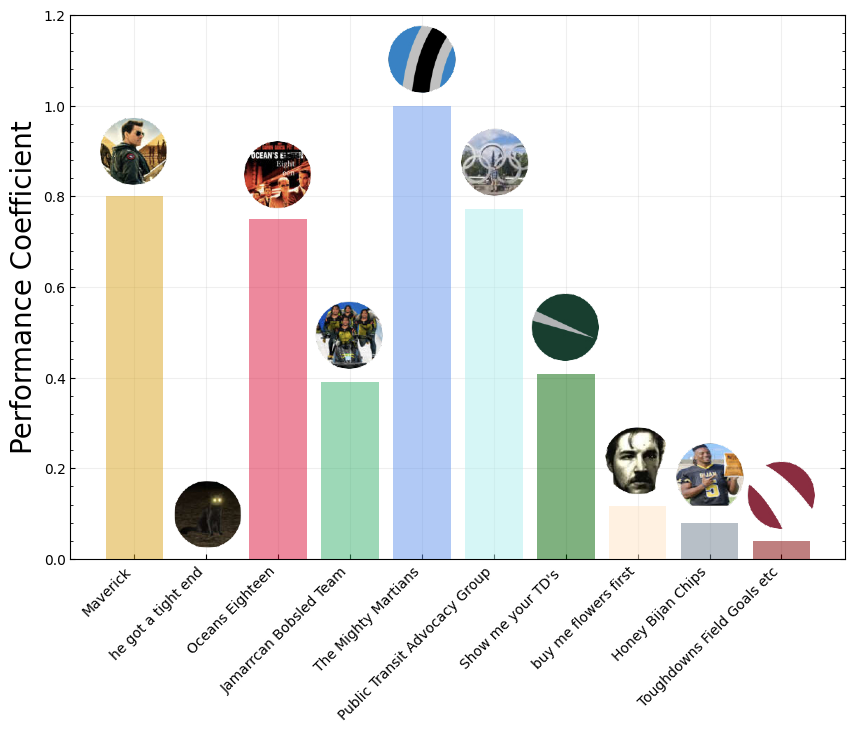

In [644]:
skill_coef = (skill*15/max(skill)-15)/1.9728 +1

skill_coef2 = (skill_adj-min(skill_adj))
skill_coef2 = skill_coef2/max(skill_coef2)

width=10;height=8;ff, ax1 = plt.subplots(1,1, sharex=True, sharey=True);ff.set_figwidth(width);ff.set_figheight(height)
ax1.set_ylabel("Performance Coefficient", fontsize=20)
#ax1.set_ylim(0,13)
ax1.bar(name, skill_coef2, color=colours,zorder=10,alpha=0.5)

#for xp,yp, m, c in zip(name,wins,markers,colours):
#    ax1.scatter([xp], [yp], color=c, marker=m, s=180,zorder=30)

for x0, y0, path in zip(name, skill_coef2,im_paths):
    ab = AnnotationBbox(getImage(path,0.5), (x0, y0+0.1), frameon=False, zorder=10)
    ax1.add_artist(ab)

ax1.yaxis.set_minor_locator(MultipleLocator(0.04))
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.tick_params(axis='both', direction="in")
#ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
#ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.2, zorder=0)
ff.autofmt_xdate(rotation=45)
ax1.set_ylim(0,1.2)
plt.savefig('/Users/benrasmussen/Desktop/Fantasy/perf.png', dpi=300)


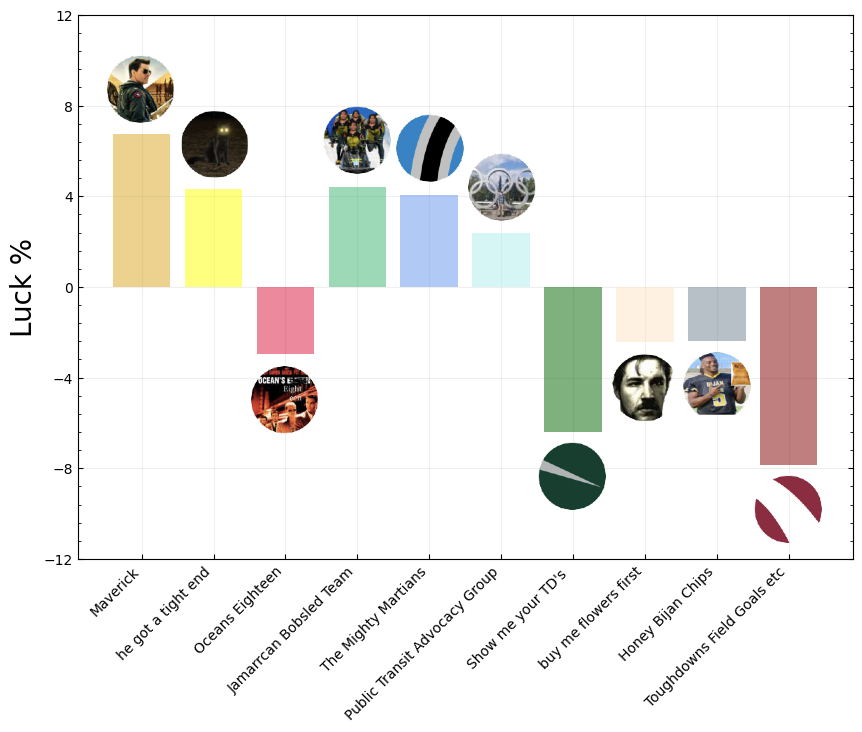

In [645]:
width=10;height=8;ff, ax1 = plt.subplots(1,1, sharex=True, sharey=True);ff.set_figwidth(width);ff.set_figheight(height)
ax1.set_ylabel("Luck %", fontsize=20)
#ax1.set_ylim(0,13)
ax1.bar(name, luck_adj, color=colours,zorder=10,alpha=0.5)

#for xp,yp, m, c in zip(name,wins,markers,colours):
#    ax1.scatter([xp], [yp], color=c, marker=m, s=180,zorder=30)

for x0, y0, path in zip(name, luck_adj,im_paths):
    ab = AnnotationBbox(getImage(path,0.5), (x0, y0+2 if y0>0 else y0-2), frameon=False, zorder=10)
    ax1.add_artist(ab)

ax1.yaxis.set_minor_locator(MultipleLocator(0.8))
ax1.yaxis.set_major_locator(MultipleLocator(4))
ax1.tick_params(axis='both', direction="in")
#ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
#ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.2, zorder=0)
ff.autofmt_xdate(rotation=45)
ax1.set_ylim(-12,12)
plt.savefig('/Users/benrasmussen/Desktop/Fantasy/luck.png', dpi=300)


In [604]:
log_pfpa = np.log(PF/PA); log_wl = np.log(wins/losses)
fit = LinearRegression().fit(log_pfpa.values.reshape(-1,1),log_wl)
fit_m = fit.coef_; fit_b = fit.intercept_


In [605]:
fit_m, fit_b

(array([4.34822943]), 0.005957957886295322)

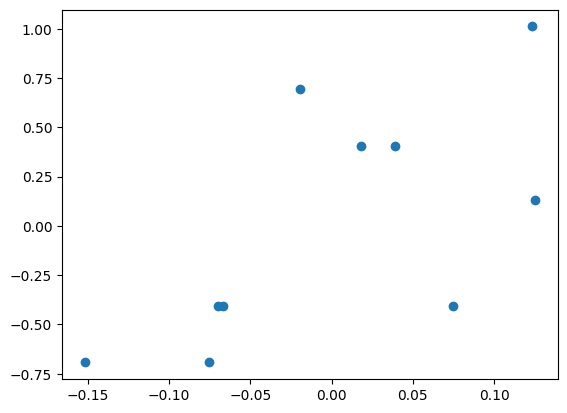

In [602]:
plt.scatter(np.log(PF/PA), np.log(wins/losses))